#Import and Understanding Data

##Import Packages

In [ ]:
#import semua package dan library yang diperlukan untuk model
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, accuracy_score
from scipy.stats import f_oneway
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
%matplotlib inline

##Import Data

In [ ]:
#import dataset yang diberikan
url1 = 'https://drive.google.com/file/d/1ndRqKchrv8DgDQJau_XM7r-tXvEF1p5c/view?usp=share_link'
path1 = 'https://drive.google.com/uc?export=download&id='+url1.split('/')[-2]
df1 = pd.read_csv(path1)
url2 = 'https://drive.google.com/file/d/11EKpmjnywDSjRBoo8xJtPJt7VkRAT5Wp/view?usp=sharing'
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
df2=pd.read_csv(path2)

##Understanding

In [ ]:
#melihat dataset
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
df2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


#Pre-Processing

##Handling Missing Values

In [ ]:
df1.drop_duplicates(inplace=True)
df1.dropna(inplace=True)
df2.drop_duplicates(inplace=True)
df2.dropna(inplace=True)

##Handling Outliers

In [ ]:
def remove_outlier(sample):
  Q1 = sample.quantile(0.25)
  Q3 = sample.quantile(0.75)

  IQR = Q3 - Q1

  lower_range = Q1 -(1.5 * IQR)
  upper_range = Q3 +(1.5 * IQR)

  print("Number of Samples {}".format(len(sample)))

  number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])

  print("Number of Outliers {}".format(number_outlier))

  sample = sample[(sample>lower_range)&(sample<upper_range)]
  print("Number of Sample without Outliers {}\r\n".format(len(sample)))

  return sample

In [ ]:
float_vars = df1.select_dtypes("float").columns
for var in float_vars:
  print("Variable name {} \r\n".format(var))
  df1[var] = remove_outlier(df1[var])

Variable name AMT_INCOME_TOTAL 

Number of Samples 304354
Number of Outliers 14984
Number of Sample without Outliers 283015

Variable name CNT_FAM_MEMBERS 

Number of Samples 304354
Number of Outliers 4604
Number of Sample without Outliers 299750



In [ ]:
df2.shape

(1048575, 3)

##Combining the Data

In [ ]:
bigdf=pd.merge(df1, df2, how='inner')
bigdf.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,C
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1,C
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,C
3,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3,C
4,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-4,C


In [ ]:
bigdf.shape

(537667, 20)

##Checking and Handling for Additional Missing Values

In [ ]:
print('''

before

''')
print(bigdf.isnull().sum())
bigdf.drop_duplicates(inplace=True)
bigdf.dropna(inplace=True)
print('''

after

''')
bigdf.isnull().sum()



before


ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL       40641
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE            0
CNT_FAM_MEMBERS         7938
MONTHS_BALANCE             0
STATUS                     0
dtype: int64


after




ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [ ]:
bigdf.shape

(489873, 20)

In [ ]:
bigdf.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,C
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1,C
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,C
3,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3,C
4,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-4,C


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


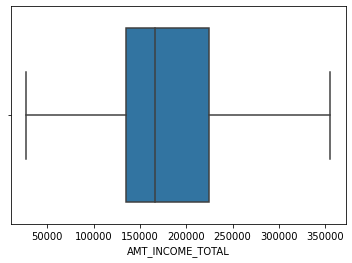

In [ ]:
sns.boxplot(bigdf['AMT_INCOME_TOTAL'])

##Seperating the Data

In [ ]:
bigdf['STATUS'].unique()

array(['C', 'X', '0', '1', '5', '4', '3', '2'], dtype=object)

###Bad Customer

In [ ]:
baddf2=bigdf[bigdf['STATUS']=='2']
baddf3=bigdf[bigdf['STATUS']=='3']
baddf4=bigdf[bigdf['STATUS']=='4']
baddf5=bigdf[bigdf['STATUS']=='5']
baddfall=pd.concat([baddf2, baddf3, baddf4, baddf5], axis=0).assign(Location=1)
baddfall

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Location
10841,5009628,F,N,N,0,238500.0,Working,Secondary / secondary special,Married,House / apartment,...,-3296,1,1,0,0,Laborers,2.0,-38,2,1
14296,5009938,F,N,Y,2,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,-2351,1,0,0,0,Sales staff,4.0,-21,2,1
20718,5010535,F,Y,N,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,-3052,1,0,0,0,Laborers,4.0,-50,2,1
20828,5010541,F,Y,N,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,-3052,1,0,0,0,Laborers,4.0,-50,2,1
25810,5010923,F,N,N,0,94500.0,Working,Secondary / secondary special,Widow,Rented apartment,...,-829,1,0,0,1,Sales staff,1.0,-44,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537626,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-16,5,1
537627,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-17,5,1
537628,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-18,5,1
537629,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-19,5,1


###Good Customer

In [ ]:
gooddf0=bigdf[bigdf['STATUS']=='0']
gooddf1=bigdf[bigdf['STATUS']=='1']
gooddfc=bigdf[bigdf['STATUS']=='C']
gooddfx=bigdf[bigdf['STATUS']=='X']
gooddfall=pd.concat([gooddf0, gooddf1, gooddfc, gooddfx], axis=0).assign(Location=2)
gooddfall

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Location
8,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-8,0,2
9,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-9,0,2
11,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-11,0,2
13,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-13,0,2
20,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-20,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537581,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,-7,X,2
537582,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,-8,X,2
537583,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,-9,X,2
537584,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,-10,X,2


##Handling ID Duplicates

Jika untuk ID yang sama terdapat peminjaman minimal satu saja yang terlambat bayar 60 hari atau lebih, akan dianggap bad saja sehingga dihapus ID nya dari Good Customer dan hanya ada di Bad Customer. Setelah itu untuk keduanya dihapus ID duplikat dan hanya diambil yang terakhir.

In [ ]:
print('before: ', gooddfall.shape)
gooddfall=gooddfall[~gooddfall['ID'].isin(baddfall['ID'])]
print('after: ', gooddfall.shape)

before:  (488132, 21)
after:  (476996, 21)


In [ ]:
gooddfall=gooddfall.drop_duplicates(subset='ID', keep="last")
print('after:' ,gooddfall.shape)
gooddfall.head()

after: (22645, 21)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Location
111,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,-769,1,1,1,1,Accountants,2.0,-5,0,2
198,5008824,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-1194,1,0,0,0,Laborers,2.0,-3,0,2
565,5008846,M,Y,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-4450,1,0,1,0,Drivers,2.0,-11,0,2
636,5008850,M,Y,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-4450,1,0,1,0,Drivers,2.0,-25,0,2
648,5008851,M,Y,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-4450,1,0,1,0,Drivers,2.0,-11,0,2


In [ ]:
print('before: ', baddfall.shape)
baddfall=baddfall.drop_duplicates(subset='ID', keep="last")
print('after:' ,baddfall.shape)
baddfall.head()

before:  (1741, 21)
after: (381, 21)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Location
14296,5009938,F,N,Y,2,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,-2351,1,0,0,0,Sales staff,4.0,-21,2,1
20718,5010535,F,Y,N,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,-3052,1,0,0,0,Laborers,4.0,-50,2,1
20828,5010541,F,Y,N,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,-3052,1,0,0,0,Laborers,4.0,-50,2,1
25810,5010923,F,N,N,0,94500.0,Working,Secondary / secondary special,Widow,Rented apartment,...,-829,1,0,0,1,Sales staff,1.0,-44,2,1
36018,5021802,F,N,Y,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-187,1,0,0,0,Core staff,2.0,-5,2,1


In [ ]:
bigdf=pd.concat([gooddfall, baddfall])

## Removing Unnecessary Columns


In [ ]:
bigdf.drop(['ID'], axis=1, inplace=True)
gooddfall.drop(['ID'], axis=1, inplace=True)
baddfall.drop(['ID'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


##Downloading DataFrame to csv For R

In [ ]:
bigdf5=bigdf.copy()
bigdf5["FLAG_MOBIL"].replace([1,0],['Y','N'],inplace=True)
bigdf5["FLAG_WORK_PHONE"].replace([1,0],['Y','N'],inplace=True)
bigdf5["FLAG_PHONE"].replace([1,0],['Y','N'],inplace=True)
bigdf5["FLAG_EMAIL"].replace([1,0],['Y','N'],inplace=True)
bigdf5.drop(['STATUS'], axis=1, inplace=True)
bigdf5.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location
111,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,Y,Y,Y,Y,Accountants,2.0,-5,2
198,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17778,-1194,Y,N,N,N,Laborers,2.0,-3,2
565,M,Y,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-20502,-4450,Y,N,Y,N,Drivers,2.0,-11,2
636,M,Y,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-20502,-4450,Y,N,Y,N,Drivers,2.0,-25,2
648,M,Y,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-20502,-4450,Y,N,Y,N,Drivers,2.0,-11,2


In [ ]:
from google.colab import files
bigdf5.to_csv('bigdf.csv', encoding = 'utf-8-sig')
files.download('bigdf.csv')
del(bigdf5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
bigdf.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Location
111,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,-5,0,2
198,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17778,-1194,1,0,0,0,Laborers,2.0,-3,0,2
565,M,Y,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-20502,-4450,1,0,1,0,Drivers,2.0,-11,0,2
636,M,Y,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-20502,-4450,1,0,1,0,Drivers,2.0,-25,0,2
648,M,Y,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-20502,-4450,1,0,1,0,Drivers,2.0,-11,0,2


#EDA, Visualization & Predicting Significant Contributing Variables

##Numerical Variables

In [ ]:
baddfall1=baddfall[['AMT_INCOME_TOTAL', 'Location']]
gooddfall1=gooddfall[['AMT_INCOME_TOTAL', 'Location']]

baddfall2=baddfall[['CNT_FAM_MEMBERS', 'Location']]
gooddfall2=gooddfall[['CNT_FAM_MEMBERS', 'Location']]


baddfall3=baddfall[['MONTHS_BALANCE', 'Location']]
gooddfall3=gooddfall[['MONTHS_BALANCE', 'Location']]

baddfall4=baddfall[['CNT_CHILDREN', 'Location']]
gooddfall4=gooddfall[['CNT_CHILDREN', 'Location']]

cdf = pd.concat([baddfall1, gooddfall1])
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Variable'])

cdf1 = pd.concat([baddfall2, gooddfall2])
mdf1 = pd.melt(cdf1, id_vars=['Location'], var_name=['Variable'])

cdf2 = pd.concat([baddfall3, gooddfall3])
mdf2 = pd.melt(cdf2, id_vars=['Location'], var_name=['Variable'])

cdf3 = pd.concat([baddfall4, gooddfall4])
mdf3 = pd.melt(cdf2, id_vars=['Location'], var_name=['Variable'])
print(mdf.head())
print('')
print(mdf1.head())
print('')
print(mdf2.head())
print('')
print(mdf3.head())

   Location          Variable     value
0         1  AMT_INCOME_TOTAL  157500.0
1         1  AMT_INCOME_TOTAL  135000.0
2         1  AMT_INCOME_TOTAL  135000.0
3         1  AMT_INCOME_TOTAL   94500.0
4         1  AMT_INCOME_TOTAL  225000.0

   Location         Variable  value
0         1  CNT_FAM_MEMBERS    4.0
1         1  CNT_FAM_MEMBERS    4.0
2         1  CNT_FAM_MEMBERS    4.0
3         1  CNT_FAM_MEMBERS    1.0
4         1  CNT_FAM_MEMBERS    2.0

   Location        Variable  value
0         1  MONTHS_BALANCE    -21
1         1  MONTHS_BALANCE    -50
2         1  MONTHS_BALANCE    -50
3         1  MONTHS_BALANCE    -44
4         1  MONTHS_BALANCE     -5

   Location        Variable  value
0         1  MONTHS_BALANCE    -21
1         1  MONTHS_BALANCE    -50
2         1  MONTHS_BALANCE    -50
3         1  MONTHS_BALANCE    -44
4         1  MONTHS_BALANCE     -5


###Box Plot of Each Numerical Variables

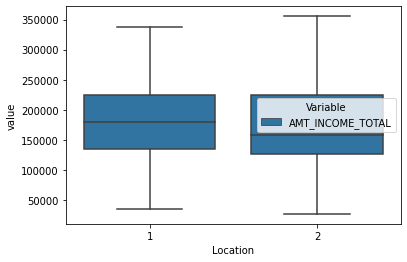

In [ ]:
ax = sns.boxplot(x="Location", y="value", hue="Variable", data=mdf)
plt.show()

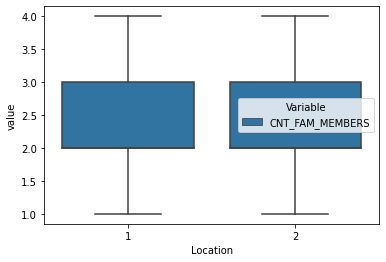

In [ ]:
ax = sns.boxplot(x="Location", y="value", hue="Variable", data=mdf1)
plt.show()

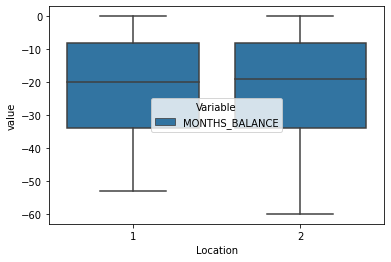

In [ ]:
ax = sns.boxplot(x="Location", y="value", hue="Variable", data=mdf2)
plt.show()

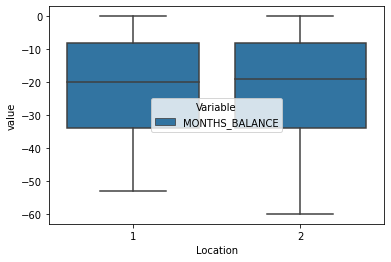

In [ ]:
ax = sns.boxplot(x="Location", y="value", hue="Variable", data=mdf3)
plt.show()

####Notes
Tinggal bandingin tiap plot kiri (itu yg bad location 1) ama kanan (good location 2) cukup beda ato gk bwt nanti di model

##Categorical Variables

In [ ]:
gud=gooddfall.copy()
gud["FLAG_MOBIL"].replace([1,0],['Y','N'],inplace=True)
gud["FLAG_WORK_PHONE"].replace([1,0],['Y','N'],inplace=True)
gud["FLAG_PHONE"].replace([1,0],['Y','N'],inplace=True)
gud["FLAG_EMAIL"].replace([1,0],['Y','N'],inplace=True)
gud1=gud.copy()
gud.drop(['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'CNT_CHILDREN'], axis=1, inplace=True)
gud

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,STATUS,Location
111,M,Y,Y,Working,Higher education,Married,House / apartment,-16872,-769,Y,Y,Y,Y,Accountants,0,2
198,M,Y,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,-17778,-1194,Y,N,N,N,Laborers,0,2
565,M,Y,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,-20502,-4450,Y,N,Y,N,Drivers,0,2
636,M,Y,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,-20502,-4450,Y,N,Y,N,Drivers,0,2
648,M,Y,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,-20502,-4450,Y,N,Y,N,Drivers,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530974,M,Y,Y,Working,Secondary / secondary special,Single / not married,House / apartment,-9874,-1650,Y,Y,N,N,Medicine staff,X,2
530982,M,Y,Y,Working,Secondary / secondary special,Single / not married,House / apartment,-9874,-1650,Y,Y,N,N,Medicine staff,X,2
530987,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,-16302,-8894,Y,N,N,N,Medicine staff,X,2
531078,F,Y,Y,Working,Secondary / secondary special,Married,House / apartment,-14234,-309,Y,N,N,N,Core staff,X,2


In [ ]:
bad=baddfall.copy()
bad["FLAG_MOBIL"].replace([1,0],['Y','N'],inplace=True)
bad["FLAG_WORK_PHONE"].replace([1,0],['Y','N'],inplace=True)
bad["FLAG_PHONE"].replace([1,0],['Y','N'],inplace=True)
bad["FLAG_EMAIL"].replace([1,0],['Y','N'],inplace=True)
bad1=bad.copy()
bad.drop(['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'CNT_CHILDREN'], axis=1, inplace=True)
bad

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,STATUS,Location
14296,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,-10710,-2351,Y,N,N,N,Sales staff,2,1
20718,F,Y,N,Working,Secondary / secondary special,Married,House / apartment,-13928,-3052,Y,N,N,N,Laborers,2,1
20828,F,Y,N,Working,Secondary / secondary special,Married,House / apartment,-13928,-3052,Y,N,N,N,Laborers,2,1
25810,F,N,N,Working,Secondary / secondary special,Widow,Rented apartment,-22265,-829,Y,N,N,Y,Sales staff,2,1
36018,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,-12325,-187,Y,N,N,N,Core staff,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537361,F,N,Y,Working,Secondary / secondary special,Widow,House / apartment,-14394,-919,Y,N,Y,N,Managers,5,1
537426,M,Y,N,Working,Secondary / secondary special,Married,Office apartment,-17209,-1081,Y,N,N,N,Security staff,5,1
537576,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,Y,N,N,N,Managers,5,1
537597,F,N,Y,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,Y,N,Y,Y,Medicine staff,5,1


###Pie Chart of Each Categorical Variables

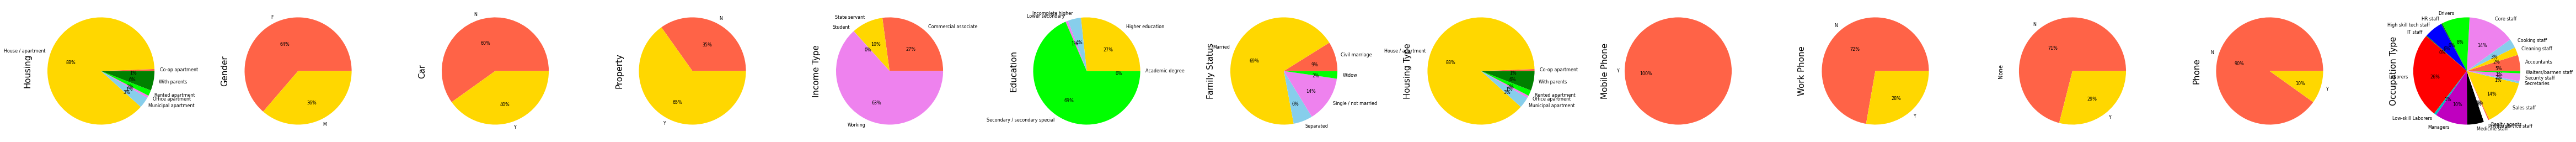

In [ ]:
#Good Customer
def label_function(val):
    return f'\n{val:.0f}%'

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13) = plt.subplots(ncols=13, figsize=(65, 5))
color=['tomato', 'gold', 'skyblue', 'violet', 'lime', 'green', 'blue', 'g', 'r', 'c', 'm', 'k', 'w']

gud.groupby('NAME_HOUSING_TYPE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                  colors=color, ax=ax1)
gud.groupby('CODE_GENDER').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax2)
gud.groupby('FLAG_OWN_CAR').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax3)
gud.groupby('FLAG_OWN_REALTY').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax4)
gud.groupby('NAME_INCOME_TYPE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax5)
gud.groupby('NAME_EDUCATION_TYPE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax6)
gud.groupby('NAME_FAMILY_STATUS').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax7)
gud.groupby('NAME_HOUSING_TYPE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax8)
gud.groupby('FLAG_MOBIL').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax9)
gud.groupby('FLAG_WORK_PHONE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax10)
gud.groupby('FLAG_PHONE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax11)
gud.groupby('FLAG_EMAIL').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax12)
gud.groupby('OCCUPATION_TYPE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax13)

ax1.set_ylabel('Housing', size=15)
ax2.set_ylabel('Gender', size=15)
ax3.set_ylabel('Car', size=15)
ax4.set_ylabel('Property', size=15)
ax5.set_ylabel('Income Type', size=15)
ax6.set_ylabel('Education', size=15)
ax7.set_ylabel('Family Status', size=15)
ax8.set_ylabel('Housing Type', size=15)
ax9.set_ylabel('Mobile Phone', size=15)
ax10.set_ylabel('Work Phone', size=15)
ax12.set_ylabel('Phone', size=15)
ax13.set_ylabel('Email', size=15)
ax13.set_ylabel('Occupation Type', size=15)

plt.tight_layout()
plt.show()

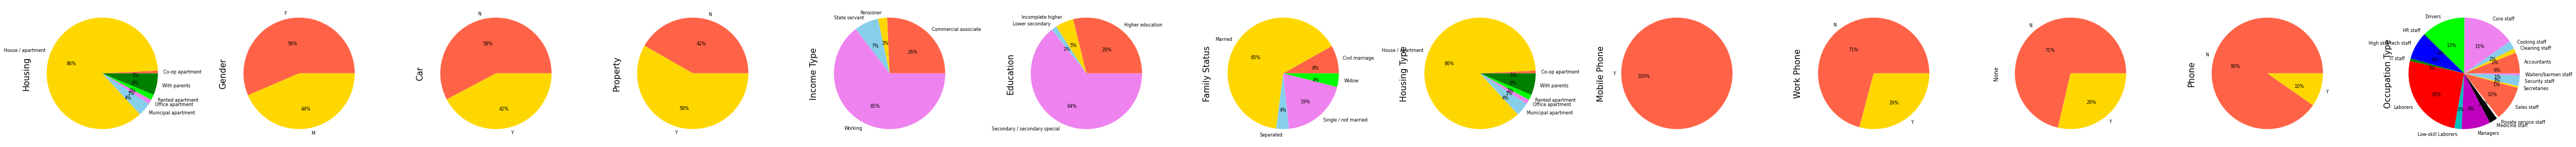

In [ ]:
#Bad Customer
def label_function(val):
    return f'\n{val:.0f}%'

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13) = plt.subplots(ncols=13, figsize=(65, 5))
color=['tomato', 'gold', 'skyblue', 'violet', 'lime', 'green', 'blue', 'g', 'r', 'c', 'm', 'k', 'w']

bad.groupby('NAME_HOUSING_TYPE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                  colors=color, ax=ax1)
bad.groupby('CODE_GENDER').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax2)
bad.groupby('FLAG_OWN_CAR').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax3)
bad.groupby('FLAG_OWN_REALTY').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax4)
bad.groupby('NAME_INCOME_TYPE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax5)
bad.groupby('NAME_EDUCATION_TYPE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax6)
bad.groupby('NAME_FAMILY_STATUS').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax7)
bad.groupby('NAME_HOUSING_TYPE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax8)
bad.groupby('FLAG_MOBIL').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax9)
bad.groupby('FLAG_WORK_PHONE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax10)
bad.groupby('FLAG_PHONE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                               colors=color, ax=ax11)
bad.groupby('FLAG_EMAIL').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax12)
bad.groupby('OCCUPATION_TYPE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8},
                                 colors=color, ax=ax13)

ax1.set_ylabel('Housing', size=15)
ax2.set_ylabel('Gender', size=15)
ax3.set_ylabel('Car', size=15)
ax4.set_ylabel('Property', size=15)
ax5.set_ylabel('Income Type', size=15)
ax6.set_ylabel('Education', size=15)
ax7.set_ylabel('Family Status', size=15)
ax8.set_ylabel('Housing Type', size=15)
ax9.set_ylabel('Mobile Phone', size=15)
ax10.set_ylabel('Work Phone', size=15)
ax12.set_ylabel('Phone', size=15)
ax13.set_ylabel('Email', size=15)
ax13.set_ylabel('Occupation Type', size=15)

plt.tight_layout()
plt.show()

####Notes
Tinggal bandingin plot atas ama bawah % nya beda jauh ato gk bwt model

###Visualisasi Gabungan

In [ ]:
# dataset = pd.get_dummies(dataset,columns=["acqCountry"], drop_first=True)
bigdf=pd.concat([bad1,gud1])

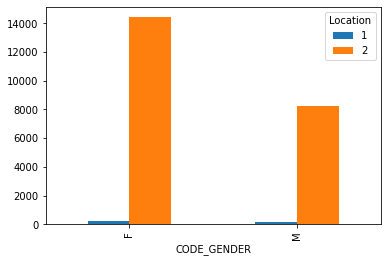

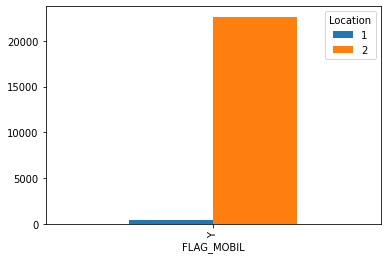

In [ ]:
pd.crosstab(bigdf.CODE_GENDER,bigdf.Location).plot(kind='bar')
#0 = Female
#1 = Male
pd.crosstab(bigdf.FLAG_MOBIL,bigdf.Location).plot(kind='bar')

Grafik di atas bertujuan untuk menunjukkan bahwa bar plot tidak baik digunakan pada kasus ini

## Getting Dummy Variables

In [ ]:
bigdf=pd.get_dummies(bigdf, columns=['CODE_GENDER', "NAME_HOUSING_TYPE", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE",
                                        "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", 'NAME_HOUSING_TYPE', "FLAG_OWN_CAR", 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE'], drop_first=True)
bigdf2 = bigdf.copy()
bigdf2.shape
bigdf2

#BAD CUSTOMER = LOCATION 1
#GOOD CUSTOMER = LOCATION 2


,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Location,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
14296,2,157500.0,-10710,-2351,4.0,-21,2,1,0,1,...,0,0,0,0,0,0,1,0,0,0
20718,2,135000.0,-13928,-3052,4.0,-50,2,1,0,1,...,1,0,0,0,0,0,0,0,0,0
20828,2,135000.0,-13928,-3052,4.0,-50,2,1,0,1,...,1,0,0,0,0,0,0,0,0,0
25810,0,94500.0,-22265,-829,1.0,-44,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
36018,0,225000.0,-12325,-187,2.0,-5,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530974,0,112500.0,-9874,-1650,1.0,-13,X,2,1,1,...,0,0,0,1,0,0,0,0,0,0
530982,0,112500.0,-9874,-1650,1.0,-7,X,2,1,1,...,0,0,0,1,0,0,0,0,0,0
530987,1,135000.0,-16302,-8894,3.0,-4,X,2,0,1,...,0,0,0,1,0,0,0,0,0,0
531078,1,112500.0,-14234,-309,3.0,-38,X,2,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
bigdfnew = bigdf2
bigdfnew.drop(['STATUS'], axis=1, inplace=True)
bigdfnew

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
14296,2,157500.0,-10710,-2351,4.0,-21,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
20718,2,135000.0,-13928,-3052,4.0,-50,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
20828,2,135000.0,-13928,-3052,4.0,-50,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
25810,0,94500.0,-22265,-829,1.0,-44,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
36018,0,225000.0,-12325,-187,2.0,-5,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530974,0,112500.0,-9874,-1650,1.0,-13,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0
530982,0,112500.0,-9874,-1650,1.0,-7,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0
530987,1,135000.0,-16302,-8894,3.0,-4,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0
531078,1,112500.0,-14234,-309,3.0,-38,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0


##Corr Check

In [ ]:
#pearson method

bigdfnew.corr(method = 'pearson')

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
CNT_CHILDREN,1.000000,-0.025566,0.276140,0.071494,0.878703,-0.010025,0.011616,0.016524,-0.015443,0.000790,...,-0.013809,-0.003616,0.017032,-0.025010,0.005727,0.003233,0.013696,0.009624,-0.031686,-0.011244
AMT_INCOME_TOTAL,-0.025566,1.000000,-0.031559,-0.025302,-0.041254,-0.021636,-0.008588,0.205737,0.004210,-0.013359,...,-0.015319,-0.055065,0.186337,-0.053493,0.017940,0.064211,-0.073841,-0.015983,-0.040788,-0.032958
DAYS_BIRTH,0.276140,-0.031559,1.000000,0.347702,0.218097,0.077608,-0.003083,0.112824,-0.144890,-0.016396,...,0.022015,-0.008597,-0.033481,-0.076448,-0.010973,-0.004859,0.088990,-0.010292,-0.083813,0.031720
DAYS_EMPLOYED,0.071494,-0.025302,0.347702,1.000000,0.050769,0.085467,-0.029130,0.128945,-0.049429,-0.024741,...,-0.026303,0.014704,-0.039363,-0.162627,-0.015040,-0.003671,0.127355,-0.000464,0.054889,0.029962
CNT_FAM_MEMBERS,0.878703,-0.041254,0.218097,0.050769,1.000000,-0.029610,0.013935,0.046079,0.013416,-0.010654,...,-0.015501,0.009148,0.035299,-0.021233,-0.015232,0.013359,0.011120,-0.000853,-0.022174,-0.024200
MONTHS_BALANCE,-0.010025,-0.021636,0.077608,0.085467,-0.029610,1.000000,-0.004653,0.005451,-0.019129,-0.007845,...,0.015263,0.000403,-0.021909,-0.008354,0.015020,0.015522,0.029645,-0.000540,0.000010,0.012971
Location,0.011616,-0.008588,-0.003083,-0.029130,0.013935,-0.004653,1.000000,-0.019200,0.006438,-0.004346,...,0.000313,-0.020010,0.006067,0.015790,0.009616,0.007611,0.015047,0.001848,-0.006679,0.002772
CODE_GENDER_M,0.016524,0.205737,0.112824,0.128945,0.046079,0.005451,-0.019200,1.000000,-0.045174,-0.015028,...,0.255768,0.077118,0.039632,-0.161292,-0.072340,-0.029000,-0.202570,-0.055035,0.107069,-0.037832
NAME_HOUSING_TYPE_House / apartment,-0.015443,0.004210,-0.144890,-0.049429,0.013416,-0.019129,0.006438,-0.045174,1.000000,-0.496423,...,-0.030110,0.017510,0.043560,0.010287,0.025307,0.019692,-0.023694,-0.006555,0.006037,0.026748
NAME_HOUSING_TYPE_Municipal apartment,0.000790,-0.013359,-0.016396,-0.024741,-0.010654,-0.007845,-0.004346,-0.015028,-0.496423,1.000000,...,0.014725,-0.013471,-0.038400,0.003814,-0.015898,-0.010899,0.048506,-0.005779,0.018810,-0.015636


In [ ]:
#kendall method

bigdfnew.corr(method = 'kendall')

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
CNT_CHILDREN,1.000000,-0.018878,0.224501,0.028012,0.813067,-0.008394,0.011650,0.012638,-0.018487,0.007279,...,-0.021384,-0.004589,0.017972,-0.028443,0.010762,0.008454,0.019352,0.010144,-0.033739,-0.004220
AMT_INCOME_TOTAL,-0.018878,1.000000,-0.021395,-0.030561,-0.033119,-0.020250,-0.007604,0.183204,0.006299,-0.010668,...,-0.008794,-0.052345,0.152877,-0.048645,0.014960,0.050672,-0.062389,-0.015475,-0.033216,-0.027167
DAYS_BIRTH,0.224501,-0.021395,1.000000,0.202526,0.165631,0.051100,-0.001479,0.096458,-0.119118,-0.015445,...,0.014967,-0.007819,-0.028355,-0.061101,-0.008936,-0.002241,0.069736,-0.003568,-0.063214,0.025460
DAYS_EMPLOYED,0.028012,-0.030561,0.202526,1.000000,0.005504,0.071120,-0.025239,0.087998,-0.046055,-0.005337,...,-0.032412,0.010219,-0.047782,-0.092922,-0.015947,-0.012556,0.096455,-0.004376,0.051629,0.017541
CNT_FAM_MEMBERS,0.813067,-0.033119,0.165631,0.005504,1.000000,-0.024597,0.012975,0.043162,0.011111,-0.005726,...,-0.018667,0.009518,0.036584,-0.022406,-0.013833,0.016919,0.014332,-0.001869,-0.021338,-0.020505
MONTHS_BALANCE,-0.008394,-0.020250,0.051100,0.071120,-0.024597,1.000000,-0.001843,0.004539,-0.015295,-0.007724,...,0.013821,0.000093,-0.019143,-0.007981,0.013716,0.012802,0.025075,-0.001072,-0.000073,0.008959
Location,0.011650,-0.007604,-0.001479,-0.025239,0.012975,-0.001843,1.000000,-0.019200,0.006438,-0.004346,...,0.000313,-0.020010,0.006067,0.015790,0.009616,0.007611,0.015047,0.001848,-0.006679,0.002772
CODE_GENDER_M,0.012638,0.183204,0.096458,0.087998,0.043162,0.004539,-0.019200,1.000000,-0.045174,-0.015028,...,0.255768,0.077118,0.039632,-0.161292,-0.072340,-0.029000,-0.202570,-0.055035,0.107069,-0.037832
NAME_HOUSING_TYPE_House / apartment,-0.018487,0.006299,-0.119118,-0.046055,0.011111,-0.015295,0.006438,-0.045174,1.000000,-0.496423,...,-0.030110,0.017510,0.043560,0.010287,0.025307,0.019692,-0.023694,-0.006555,0.006037,0.026748
NAME_HOUSING_TYPE_Municipal apartment,0.007279,-0.010668,-0.015445,-0.005337,-0.005726,-0.007724,-0.004346,-0.015028,-0.496423,1.000000,...,0.014725,-0.013471,-0.038400,0.003814,-0.015898,-0.010899,0.048506,-0.005779,0.018810,-0.015636


In [ ]:
#spearman method

bigdfnew.corr(method = 'spearman')

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
CNT_CHILDREN,1.000000,-0.023298,0.284825,0.035773,0.848118,-0.010510,0.012071,0.013095,-0.019155,0.007542,...,-0.022157,-0.004754,0.018622,-0.029471,0.011151,0.008759,0.020052,0.010511,-0.034959,-0.004372
AMT_INCOME_TOTAL,-0.023298,1.000000,-0.030845,-0.044226,-0.042304,-0.029226,-0.009034,0.217669,0.007483,-0.012675,...,-0.010448,-0.062192,0.181636,-0.057796,0.017774,0.060204,-0.074126,-0.018386,-0.039465,-0.032277
DAYS_BIRTH,0.284825,-0.030845,1.000000,0.295367,0.212325,0.075366,-0.001811,0.118114,-0.145862,-0.018912,...,0.018328,-0.009575,-0.034721,-0.074818,-0.010942,-0.002744,0.085393,-0.004369,-0.077406,0.031176
DAYS_EMPLOYED,0.035773,-0.044226,0.295367,1.000000,0.006821,0.104805,-0.030902,0.107742,-0.056388,-0.006534,...,-0.039684,0.012512,-0.058503,-0.113771,-0.019525,-0.015373,0.118097,-0.005357,0.063213,0.021476
CNT_FAM_MEMBERS,0.848118,-0.042304,0.212325,0.006821,1.000000,-0.032091,0.013922,0.046311,0.011922,-0.006144,...,-0.020028,0.010212,0.039253,-0.024041,-0.014842,0.018153,0.015378,-0.002006,-0.022895,-0.022001
MONTHS_BALANCE,-0.010510,-0.029226,0.075366,0.104805,-0.032091,1.000000,-0.002235,0.005505,-0.018550,-0.009368,...,0.016762,0.000113,-0.023217,-0.009680,0.016635,0.015526,0.030411,-0.001300,-0.000088,0.010865
Location,0.012071,-0.009034,-0.001811,-0.030902,0.013922,-0.002235,1.000000,-0.019200,0.006438,-0.004346,...,0.000313,-0.020010,0.006067,0.015790,0.009616,0.007611,0.015047,0.001848,-0.006679,0.002772
CODE_GENDER_M,0.013095,0.217669,0.118114,0.107742,0.046311,0.005505,-0.019200,1.000000,-0.045174,-0.015028,...,0.255768,0.077118,0.039632,-0.161292,-0.072340,-0.029000,-0.202570,-0.055035,0.107069,-0.037832
NAME_HOUSING_TYPE_House / apartment,-0.019155,0.007483,-0.145862,-0.056388,0.011922,-0.018550,0.006438,-0.045174,1.000000,-0.496423,...,-0.030110,0.017510,0.043560,0.010287,0.025307,0.019692,-0.023694,-0.006555,0.006037,0.026748
NAME_HOUSING_TYPE_Municipal apartment,0.007542,-0.012675,-0.018912,-0.006534,-0.006144,-0.009368,-0.004346,-0.015028,-0.496423,1.000000,...,0.014725,-0.013471,-0.038400,0.003814,-0.015898,-0.010899,0.048506,-0.005779,0.018810,-0.015636


#MODELLING

## Logistic Regression Model MAIN MODEL 1

In [ ]:
#for model 1

bigdf1 = bigdfnew.copy()

In [ ]:
bigdf1

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
14296,2,157500.0,-10710,-2351,4.0,-21,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
20718,2,135000.0,-13928,-3052,4.0,-50,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
20828,2,135000.0,-13928,-3052,4.0,-50,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
25810,0,94500.0,-22265,-829,1.0,-44,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
36018,0,225000.0,-12325,-187,2.0,-5,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530974,0,112500.0,-9874,-1650,1.0,-13,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0
530982,0,112500.0,-9874,-1650,1.0,-7,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0
530987,1,135000.0,-16302,-8894,3.0,-4,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0
531078,1,112500.0,-14234,-309,3.0,-38,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#cek corr
#pearson method

bigdf1.corr(method = 'pearson')

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
CNT_CHILDREN,1.000000,-0.025566,0.276140,0.071494,0.878703,-0.010025,0.011616,0.016524,-0.015443,0.000790,...,-0.013809,-0.003616,0.017032,-0.025010,0.005727,0.003233,0.013696,0.009624,-0.031686,-0.011244
AMT_INCOME_TOTAL,-0.025566,1.000000,-0.031559,-0.025302,-0.041254,-0.021636,-0.008588,0.205737,0.004210,-0.013359,...,-0.015319,-0.055065,0.186337,-0.053493,0.017940,0.064211,-0.073841,-0.015983,-0.040788,-0.032958
DAYS_BIRTH,0.276140,-0.031559,1.000000,0.347702,0.218097,0.077608,-0.003083,0.112824,-0.144890,-0.016396,...,0.022015,-0.008597,-0.033481,-0.076448,-0.010973,-0.004859,0.088990,-0.010292,-0.083813,0.031720
DAYS_EMPLOYED,0.071494,-0.025302,0.347702,1.000000,0.050769,0.085467,-0.029130,0.128945,-0.049429,-0.024741,...,-0.026303,0.014704,-0.039363,-0.162627,-0.015040,-0.003671,0.127355,-0.000464,0.054889,0.029962
CNT_FAM_MEMBERS,0.878703,-0.041254,0.218097,0.050769,1.000000,-0.029610,0.013935,0.046079,0.013416,-0.010654,...,-0.015501,0.009148,0.035299,-0.021233,-0.015232,0.013359,0.011120,-0.000853,-0.022174,-0.024200
MONTHS_BALANCE,-0.010025,-0.021636,0.077608,0.085467,-0.029610,1.000000,-0.004653,0.005451,-0.019129,-0.007845,...,0.015263,0.000403,-0.021909,-0.008354,0.015020,0.015522,0.029645,-0.000540,0.000010,0.012971
Location,0.011616,-0.008588,-0.003083,-0.029130,0.013935,-0.004653,1.000000,-0.019200,0.006438,-0.004346,...,0.000313,-0.020010,0.006067,0.015790,0.009616,0.007611,0.015047,0.001848,-0.006679,0.002772
CODE_GENDER_M,0.016524,0.205737,0.112824,0.128945,0.046079,0.005451,-0.019200,1.000000,-0.045174,-0.015028,...,0.255768,0.077118,0.039632,-0.161292,-0.072340,-0.029000,-0.202570,-0.055035,0.107069,-0.037832
NAME_HOUSING_TYPE_House / apartment,-0.015443,0.004210,-0.144890,-0.049429,0.013416,-0.019129,0.006438,-0.045174,1.000000,-0.496423,...,-0.030110,0.017510,0.043560,0.010287,0.025307,0.019692,-0.023694,-0.006555,0.006037,0.026748
NAME_HOUSING_TYPE_Municipal apartment,0.000790,-0.013359,-0.016396,-0.024741,-0.010654,-0.007845,-0.004346,-0.015028,-0.496423,1.000000,...,0.014725,-0.013471,-0.038400,0.003814,-0.015898,-0.010899,0.048506,-0.005779,0.018810,-0.015636


In [ ]:
goodcust = bigdf1[bigdf1.Location==2]
goodcust.shape

(22645, 52)

In [ ]:
badcust= bigdf1[bigdf1.Location==1]
badcust.shape

(381, 52)

In [ ]:
#VARIABEL DEPENDEN
y = bigdf1.Location

In [ ]:
#VARIABEL INDEPENDEN
bigdf1.drop(['Location'], axis=1, inplace=True)
X = bigdf1
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
14296,2,157500.0,-10710,-2351,4.0,-21,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
20718,2,135000.0,-13928,-3052,4.0,-50,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
20828,2,135000.0,-13928,-3052,4.0,-50,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
25810,0,94500.0,-22265,-829,1.0,-44,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
36018,0,225000.0,-12325,-187,2.0,-5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [ ]:
model = LogisticRegression()

In [ ]:
print(X_train)

        CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
259321             1          157500.0      -13673          -2667   
124020             0          135000.0      -11996           -450   
456848             0          157500.0      -20516          -2265   
323484             0          112500.0      -19721          -1539   
278329             1          225000.0      -12008           -138   
...              ...               ...         ...            ...   
476198             1          225000.0      -15243          -7260   
157398             1          162000.0      -14786          -4601   
252057             0          108000.0      -15803          -9029   
36289              1           67500.0      -11454          -1678   
494369             1          180000.0      -14883          -6221   

        CNT_FAM_MEMBERS  MONTHS_BALANCE  CODE_GENDER_M  \
259321              3.0             -37              0   
124020              2.0             -40              0 

In [ ]:
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[[ 1.08141719e-03  7.47589988e-06 -1.58816247e-04 -1.42264572e-04
   2.53791654e-03 -1.03964849e-02 -7.17293621e-05  6.23438278e-04
   1.47069491e-04 -8.41137482e-05  1.33360570e-05  2.25421401e-04
   8.82441832e-04 -1.47092406e-04  1.23952025e-04  0.00000000e+00
   7.49443181e-04  8.56286718e-05  8.64970458e-05 -7.55856929e-05
   7.74257220e-04  5.63273490e-04  3.86933094e-05  1.23938871e-04
  -5.31701625e-05  6.23438278e-04  1.47069491e-04 -8.41137482e-05
   1.33360570e-05  2.25421401e-04  3.87748788e-04  2.91518906e-04
   2.62267852e-04  3.47641010e-04 -1.35408729e-05  8.75856414e-05
   2.23909989e-04 -6.64399795e-05  1.45044132e-05 -1.00708370e-04
   1.96570129e-05  2.80346488e-04 -3.97957748e-05 -1.07177420e-04
   1.09189403e-04  5.54625686e-05  1.22751614e-05  4.54887022e-04
   9.30311911e-06 -1.14388373e-04  1.59066879e-05]]
[0.00087421]


In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[2 2 2 ... 2 2 2]


In [ ]:
model.score(X_test,y_test)

0.9833116198275327

In [ ]:
confusion_matrix(y_test, y_pred)

array([[    0,   269],
       [    0, 15850]])

In [ ]:
#COUNTING MODEL ACCURACY USING CONFUSION MATRIX
#Accuracy = (true good + true bad)/total sample
model1_accuracy = (0 + 15879)/(0+240+0+15879)
print(model1_accuracy)


0.9851107388795831


### Evaluate model 1 with performance metrics for machine learning model

In [ ]:
report1 = classification_report(y_test, y_pred)
print(report1)

meta_1 = accuracy_score(y_test,y_pred)
meta_2 = f1_score(y_test,y_pred)
meta_3 = recall_score(y_test,y_pred)

print(meta_1)
print(meta_2)
print(meta_3)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       269
           2       0.98      1.00      0.99     15850

    accuracy                           0.98     16119
   macro avg       0.49      0.50      0.50     16119
weighted avg       0.97      0.98      0.98     16119

0.9833116198275327
0.0
0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Assumption Test

###Normality Test

Assumption 1: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


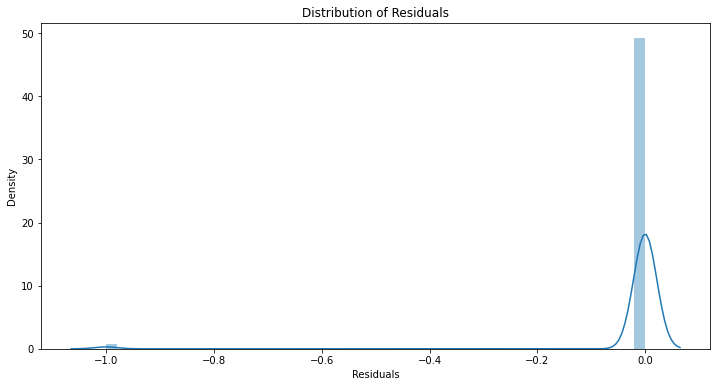


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [ ]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.

    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 1: The error terms are normally distributed', '\n')

    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)

    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)

    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()

    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

normal_errors_assumption(model, X_train, y_train)

###Linearity Test

Assumption 2: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


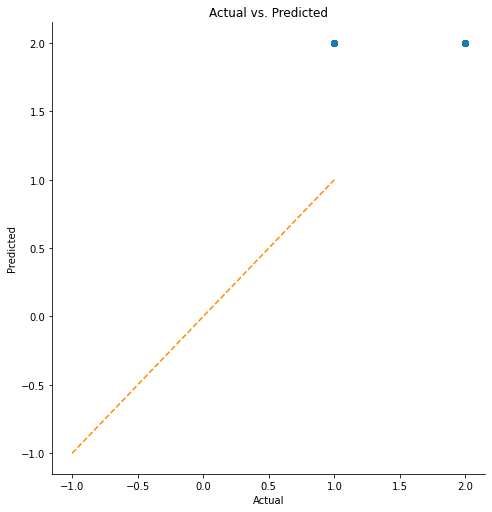

In [ ]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 2: Linear Relationship between the Target and the Feature', '\n')

    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')

    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)

    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()


linear_assumption(model, X_train, y_train)

###Homoscedasticity Test

Assumption 3: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


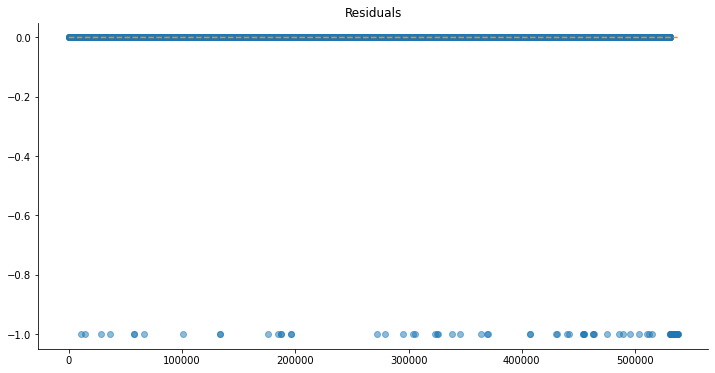

In [ ]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 3: Homoscedasticity of Error Terms', '\n')

    print('Residuals should have relative constant variance')

    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()

homoscedasticity_assumption(model, X_train, y_train)

###Auto-correlation test

In [ ]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')

    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

autocorrelation_assumption(model, X_train, y_train)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9821428571428572
Little to no autocorrelation 

Assumption satisfied


##Logistic Regression MODEL 2 (dropped below 0,001)



In [ ]:
#for model 2

bigdf2 = bigdfnew.copy()
bigdf2.drop(['FLAG_EMAIL_Y','OCCUPATION_TYPE_Laborers'], axis=1, inplace=True)

In [ ]:
bigdf2

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,...,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
14296,2,157500.0,-10710,-2351,4.0,-21,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
20718,2,135000.0,-13928,-3052,4.0,-50,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20828,2,135000.0,-13928,-3052,4.0,-50,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
25810,0,94500.0,-22265,-829,1.0,-44,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
36018,0,225000.0,-12325,-187,2.0,-5,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530974,0,112500.0,-9874,-1650,1.0,-13,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0
530982,0,112500.0,-9874,-1650,1.0,-7,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0
530987,1,135000.0,-16302,-8894,3.0,-4,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0
531078,1,112500.0,-14234,-309,3.0,-38,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#cek corr
#pearson method

bigdf2.corr(method = 'pearson')

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,...,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
CNT_CHILDREN,1.000000,-0.025566,0.276140,0.071494,0.878703,-0.010025,0.011616,0.016524,-0.015443,0.000790,...,-0.003724,-0.003616,0.017032,-0.025010,0.005727,0.003233,0.013696,0.009624,-0.031686,-0.011244
AMT_INCOME_TOTAL,-0.025566,1.000000,-0.031559,-0.025302,-0.041254,-0.021636,-0.008588,0.205737,0.004210,-0.013359,...,-0.001909,-0.055065,0.186337,-0.053493,0.017940,0.064211,-0.073841,-0.015983,-0.040788,-0.032958
DAYS_BIRTH,0.276140,-0.031559,1.000000,0.347702,0.218097,0.077608,-0.003083,0.112824,-0.144890,-0.016396,...,0.025278,-0.008597,-0.033481,-0.076448,-0.010973,-0.004859,0.088990,-0.010292,-0.083813,0.031720
DAYS_EMPLOYED,0.071494,-0.025302,0.347702,1.000000,0.050769,0.085467,-0.029130,0.128945,-0.049429,-0.024741,...,0.024236,0.014704,-0.039363,-0.162627,-0.015040,-0.003671,0.127355,-0.000464,0.054889,0.029962
CNT_FAM_MEMBERS,0.878703,-0.041254,0.218097,0.050769,1.000000,-0.029610,0.013935,0.046079,0.013416,-0.010654,...,-0.006432,0.009148,0.035299,-0.021233,-0.015232,0.013359,0.011120,-0.000853,-0.022174,-0.024200
MONTHS_BALANCE,-0.010025,-0.021636,0.077608,0.085467,-0.029610,1.000000,-0.004653,0.005451,-0.019129,-0.007845,...,0.015951,0.000403,-0.021909,-0.008354,0.015020,0.015522,0.029645,-0.000540,0.000010,0.012971
Location,0.011616,-0.008588,-0.003083,-0.029130,0.013935,-0.004653,1.000000,-0.019200,0.006438,-0.004346,...,-0.015083,-0.020010,0.006067,0.015790,0.009616,0.007611,0.015047,0.001848,-0.006679,0.002772
CODE_GENDER_M,0.016524,0.205737,0.112824,0.128945,0.046079,0.005451,-0.019200,1.000000,-0.045174,-0.015028,...,0.012586,0.077118,0.039632,-0.161292,-0.072340,-0.029000,-0.202570,-0.055035,0.107069,-0.037832
NAME_HOUSING_TYPE_House / apartment,-0.015443,0.004210,-0.144890,-0.049429,0.013416,-0.019129,0.006438,-0.045174,1.000000,-0.496423,...,-0.017921,0.017510,0.043560,0.010287,0.025307,0.019692,-0.023694,-0.006555,0.006037,0.026748
NAME_HOUSING_TYPE_Municipal apartment,0.000790,-0.013359,-0.016396,-0.024741,-0.010654,-0.007845,-0.004346,-0.015028,-0.496423,1.000000,...,-0.008922,-0.013471,-0.038400,0.003814,-0.015898,-0.010899,0.048506,-0.005779,0.018810,-0.015636


In [ ]:
goodcust2 = bigdf2[bigdf2.Location==2]
goodcust2.shape

(22645, 50)

In [ ]:
badcust2 = bigdf2[bigdf2.Location==1]
badcust2.shape

(381, 50)

In [ ]:
#VARIABEL DEPENDEN
y2 = bigdf2.Location

In [ ]:
#VARIABEL INDEPENDEN
bigdf2.drop(['Location'], axis=1, inplace=True)
X2 = bigdf2
X2.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,...,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
14296,2,157500.0,-10710,-2351,4.0,-21,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
20718,2,135000.0,-13928,-3052,4.0,-50,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20828,2,135000.0,-13928,-3052,4.0,-50,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
25810,0,94500.0,-22265,-829,1.0,-44,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
36018,0,225000.0,-12325,-187,2.0,-5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,train_size=0.3)

In [ ]:
model2 = LogisticRegression()

In [ ]:
print(X2_train)

        CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
372351             1          112500.0      -11497          -1648   
223427             0          180000.0      -14547          -4550   
27879              1          112500.0      -17067           -243   
83011              0          171000.0      -15629           -356   
73020              1          103500.0      -16381           -185   
...              ...               ...         ...            ...   
94422              1          112500.0      -10551          -3000   
440212             2           90000.0      -17384          -1138   
492266             2          135000.0      -13634          -6344   
81638              0          315000.0      -15586          -3337   
78125              0           67500.0      -19718          -2052   

        CNT_FAM_MEMBERS  MONTHS_BALANCE  CODE_GENDER_M  \
372351              3.0             -15              0   
223427              1.0             -19              0 

In [ ]:
model2.fit(X2_train, y2_train)
print(model2.coef_)
print(model2.intercept_)

[[ 1.43668255e-03  5.26832124e-06 -1.82720524e-04 -1.68932585e-04
   2.99510854e-03 -1.15687499e-02 -1.05008282e-04  7.68202036e-04
  -4.61309583e-05 -4.71583625e-05  8.22827831e-05  1.50351413e-05
   7.27384471e-04  0.00000000e+00  8.69861152e-06  3.66719750e-07
   4.51257786e-04  1.24656063e-04  1.75118788e-05  6.89547131e-06
   6.47530766e-04  5.80013141e-04  1.78406627e-04 -1.20986046e-05
  -1.27245126e-04  7.68202036e-04 -4.61309583e-05 -4.71583625e-05
   8.22827831e-05  1.50351413e-05  1.59476406e-04  1.63343884e-04
   2.79152874e-04  7.10986888e-05  8.62074014e-05  2.44538750e-04
  -2.84605602e-04  1.59666481e-05 -2.77629826e-04 -5.56235950e-05
  -3.97078809e-05 -1.58053190e-05  1.49035789e-04  5.47286676e-05
   1.01483883e-05  5.10048191e-04 -3.84610168e-05 -8.90885977e-05
   1.60926014e-05]]
[0.00079867]


In [ ]:
y2_pred = model2.predict(X2_test)
print(y2_pred)

[2 2 2 ... 2 2 2]


In [ ]:
model2.score(X2_test,y2_test)

0.9833736584155345

In [ ]:
confusion_matrix(y2_test, y2_pred)

array([[    0,   268],
       [    0, 15851]])

In [ ]:
#COUNTING MODEL ACCURACY USING CONFUSION MATRIX
#Accuracy = (true good + true bad)/total sample
model2_acc = (0+15852)/(0+267+0+15852)
print(model2_acc)

0.9834356970035362


###Evaluate model 2 with performance metrics for machine learning model

## Logistic Regression MODEL 3 (dropped below 0,01)



In [ ]:
#for model 3

bigdf3 = bigdfnew.copy()
bigdf3.drop(['NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment',
             'NAME_HOUSING_TYPE_Office apartment','NAME_HOUSING_TYPE_Rented apartment',
             'NAME_HOUSING_TYPE_With parents','NAME_INCOME_TYPE_Student','NAME_INCOME_TYPE_Working',
             'NAME_EDUCATION_TYPE_Higher education','NAME_EDUCATION_TYPE_Incomplete higher','FLAG_OWN_CAR_Y',
             'FLAG_WORK_PHONE_Y','FLAG_PHONE_Y','FLAG_EMAIL_Y','OCCUPATION_TYPE_Cleaning staff',
             'OCCUPATION_TYPE_Cooking staff','OCCUPATION_TYPE_Core staff','OCCUPATION_TYPE_HR staff',
             'OCCUPATION_TYPE_Laborers','OCCUPATION_TYPE_Managers','OCCUPATION_TYPE_Private service staff',
             'OCCUPATION_TYPE_Realty agents','OCCUPATION_TYPE_Secretaries','OCCUPATION_TYPE_Security staff',
             'OCCUPATION_TYPE_Waiters/barmen staff'], axis=1, inplace=True)

In [ ]:
bigdf3

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location,CODE_GENDER_M,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Sales staff
14296,2,157500.0,-10710,-2351,4.0,-21,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
20718,2,135000.0,-13928,-3052,4.0,-50,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20828,2,135000.0,-13928,-3052,4.0,-50,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
25810,0,94500.0,-22265,-829,1.0,-44,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
36018,0,225000.0,-12325,-187,2.0,-5,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530974,0,112500.0,-9874,-1650,1.0,-13,2,1,1,0,...,0,0,1,0,0,0,0,0,1,0
530982,0,112500.0,-9874,-1650,1.0,-7,2,1,1,0,...,0,0,1,0,0,0,0,0,1,0
530987,1,135000.0,-16302,-8894,3.0,-4,2,0,1,0,...,1,0,0,0,0,0,0,0,1,0
531078,1,112500.0,-14234,-309,3.0,-38,2,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#cek corr
#pearson method

bigdf3.corr(method = 'pearson')

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location,CODE_GENDER_M,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Sales staff
CNT_CHILDREN,1.000000,-0.025566,0.276140,0.071494,0.878703,-0.010025,0.011616,0.016524,0.015469,-0.002073,...,0.151007,-0.001608,-0.161453,-0.081139,0.005022,0.014490,-0.003724,-0.003616,-0.025010,0.013696
AMT_INCOME_TOTAL,-0.025566,1.000000,-0.031559,-0.025302,-0.041254,-0.021636,-0.008588,0.205737,0.029229,0.012705,...,-0.032710,0.023611,0.038575,-0.007545,0.079271,0.028304,-0.001909,-0.055065,-0.053493,-0.073841
DAYS_BIRTH,0.276140,-0.031559,1.000000,0.347702,0.218097,0.077608,-0.003083,0.112824,-0.091248,0.000419,...,-0.037874,-0.070248,0.118563,-0.150778,-0.014848,-0.019441,0.025278,-0.008597,-0.076448,0.088990
DAYS_EMPLOYED,0.071494,-0.025302,0.347702,1.000000,0.050769,0.085467,-0.029130,0.128945,-0.003616,-0.002088,...,-0.033846,-0.027125,0.048750,-0.034175,0.084205,-0.060943,0.024236,0.014704,-0.162627,0.127355
CNT_FAM_MEMBERS,0.878703,-0.041254,0.218097,0.050769,1.000000,-0.029610,0.013935,0.046079,0.015282,-0.003569,...,0.503233,-0.225687,-0.492389,-0.204575,0.028119,0.016241,-0.006432,0.009148,-0.021233,0.011120
MONTHS_BALANCE,-0.010025,-0.021636,0.077608,0.085467,-0.029610,1.000000,-0.004653,0.005451,0.005126,0.007805,...,-0.048826,0.004745,0.049665,0.002574,-0.014096,-0.017776,0.015951,0.000403,-0.008354,0.029645
Location,0.011616,-0.008588,-0.003083,-0.029130,0.013935,-0.004653,1.000000,-0.019200,0.018421,-0.160697,...,0.011710,0.011725,-0.020094,-0.013893,-0.019166,-0.012697,-0.015083,-0.020010,0.015790,0.015047
CODE_GENDER_M,0.016524,0.205737,0.112824,0.128945,0.046079,0.005451,-0.019200,1.000000,-0.041087,0.005870,...,0.090171,-0.062795,0.006937,-0.108409,0.360229,-0.041379,0.012586,0.077118,-0.161292,-0.202570
FLAG_OWN_REALTY_Y,0.015469,0.029229,-0.091248,-0.003616,0.015282,0.005126,0.018421,-0.041087,1.000000,0.002168,...,0.019471,-0.013391,-0.002026,0.012115,-0.019032,0.002526,-0.014199,0.000190,-0.002026,0.002055
NAME_INCOME_TYPE_Pensioner,-0.002073,0.012705,0.000419,-0.002088,-0.003569,0.007805,-0.160697,0.005870,0.002168,1.000000,...,-0.008566,-0.005165,0.015575,-0.003215,0.001136,-0.005086,-0.001001,0.022177,0.004753,-0.008513


In [ ]:
goodcust3 = bigdf3[bigdf3.Location==2]
goodcust3.shape

(22645, 23)

In [ ]:
badcust3 = bigdf3[bigdf3.Location==1]
badcust3.shape

(381, 23)

In [ ]:
#VARIABEL DEPENDEN
y3 = bigdf3.Location

In [ ]:
#VARIABEL INDEPENDEN
bigdf3.drop(['Location'], axis=1, inplace=True)
X3 = bigdf3
X3.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,CODE_GENDER_M,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Sales staff
14296,2,157500.0,-10710,-2351,4.0,-21,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
20718,2,135000.0,-13928,-3052,4.0,-50,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20828,2,135000.0,-13928,-3052,4.0,-50,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
25810,0,94500.0,-22265,-829,1.0,-44,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
36018,0,225000.0,-12325,-187,2.0,-5,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,train_size=0.3)

In [ ]:
model3 = LogisticRegression()

In [ ]:
print(X3_train)

        CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
460831             0          184500.0      -12298          -1200   
221399             0          315000.0      -19441          -4064   
220369             0          157500.0      -13389           -958   
124727             1          112500.0      -15948          -1234   
530562             0          180000.0      -11388          -1315   
...              ...               ...         ...            ...   
345814             0           54000.0      -14923          -4723   
480535             0          225000.0      -16110           -401   
198169             0          135000.0      -15884          -1003   
141404             0          112500.0       -8768          -1038   
416563             0          112500.0      -19511          -3503   

        CNT_FAM_MEMBERS  MONTHS_BALANCE  CODE_GENDER_M  FLAG_OWN_REALTY_Y  \
460831              2.0             -28              1                  1   
221399           

In [ ]:
model3.fit(X3_train, y3_train)
print(model3.coef_)
print(model3.intercept_)

[[ 1.35893010e-07  6.02003675e-06 -1.97616078e-04 -1.26403601e-04
   2.91138340e-07 -1.60669008e-06 -6.37812269e-09  6.67482623e-08
  -1.06886712e-08  1.37304780e-08 -6.07590151e-09  6.51512852e-08
   7.31691790e-08  1.55253274e-08 -5.92310682e-09 -1.30414915e-08
  -1.45520999e-08 -9.28058201e-09 -1.91351944e-09  9.50403971e-10
   1.98497352e-08  5.14666039e-08]]
[8.65305763e-08]


In [ ]:
y3_pred = model3.predict(X3_test)
print(y3_pred)

[2 2 2 ... 2 2 2]


In [ ]:
model3.score(X3_test,y3_test)

0.9833116198275327

In [ ]:
confusion_matrix(y3_test, y3_pred)

array([[    0,   269],
       [    0, 15850]])

In [ ]:
#COUNTING MODEL ACCURACY USING CONFUSION MATRIX
#Accuracy = (true good + true bad)/total sample
model3_accuracy = (0 + 15851)/(0+268+0+15851)
print(model3_accuracy)

0.9833736584155345


### Evaluate model 3 with performance metrics for machine learning model

## Logistic Regression MODEL 4 (dropped all categorical)



In [ ]:
#for model 4

bigdf4 = bigdfnew.copy()

In [ ]:
#drop gender
bigdf4.drop(['CODE_GENDER_M'], axis=1, inplace=True)

In [ ]:
#drop housing type
bigdf4.drop(['NAME_HOUSING_TYPE_House / apartment',
               'NAME_HOUSING_TYPE_Municipal apartment',
               'NAME_HOUSING_TYPE_Office apartment',
               'NAME_HOUSING_TYPE_Rented apartment',
               'NAME_HOUSING_TYPE_With parents'], axis=1, inplace=True)

In [ ]:
#drop own property yes/no
bigdf4.drop(['FLAG_OWN_REALTY_Y'], axis=1, inplace=True)

In [ ]:
#drop income type
bigdf4.drop(['NAME_INCOME_TYPE_Pensioner',
               'NAME_INCOME_TYPE_State servant',
               'NAME_INCOME_TYPE_Student',
               'NAME_INCOME_TYPE_Working'], axis=1, inplace=True)

In [ ]:
#drop education type
bigdf4.drop(['NAME_EDUCATION_TYPE_Higher education',
             'NAME_EDUCATION_TYPE_Incomplete higher',
             'NAME_EDUCATION_TYPE_Lower secondary',
             'NAME_EDUCATION_TYPE_Secondary / secondary special'], axis=1, inplace=True)

In [ ]:
#drop family status
bigdf4.drop(['NAME_FAMILY_STATUS_Married',
             'NAME_FAMILY_STATUS_Separated',
             'NAME_FAMILY_STATUS_Single / not married',
             'NAME_FAMILY_STATUS_Widow'], axis=1, inplace=True)

In [ ]:
#drop car, phone, email owned
bigdf4.drop(['FLAG_OWN_CAR_Y',
             'FLAG_WORK_PHONE_Y',
             'FLAG_PHONE_Y',
             'FLAG_EMAIL_Y',], axis=1, inplace=True)

In [ ]:
#drop occupation type
bigdf4.drop(['OCCUPATION_TYPE_Cleaning staff',
             'OCCUPATION_TYPE_Cooking staff',
             'OCCUPATION_TYPE_Core staff',
             'OCCUPATION_TYPE_Drivers',
             'OCCUPATION_TYPE_HR staff',
             'OCCUPATION_TYPE_High skill tech staff',
             'OCCUPATION_TYPE_IT staff',
             'OCCUPATION_TYPE_Laborers',
             'OCCUPATION_TYPE_Low-skill Laborers',
             'OCCUPATION_TYPE_Managers',
             'OCCUPATION_TYPE_Medicine staff',
             'OCCUPATION_TYPE_Private service staff',
             'OCCUPATION_TYPE_Realty agents',
             'OCCUPATION_TYPE_Sales staff',
             'OCCUPATION_TYPE_Secretaries',
             'OCCUPATION_TYPE_Security staff',
             'OCCUPATION_TYPE_Waiters/barmen staff'], axis=1, inplace=True)

In [ ]:
#check
bigdf4

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location
14296,2,157500.0,-10710,-2351,4.0,-21,1
20718,2,135000.0,-13928,-3052,4.0,-50,1
20828,2,135000.0,-13928,-3052,4.0,-50,1
25810,0,94500.0,-22265,-829,1.0,-44,1
36018,0,225000.0,-12325,-187,2.0,-5,1
...,...,...,...,...,...,...,...
530974,0,112500.0,-9874,-1650,1.0,-13,2
530982,0,112500.0,-9874,-1650,1.0,-7,2
530987,1,135000.0,-16302,-8894,3.0,-4,2
531078,1,112500.0,-14234,-309,3.0,-38,2


In [ ]:
#cek corr
#pearson method

bigdf4.corr(method = 'pearson')

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location
CNT_CHILDREN,1.000000,-0.025566,0.276140,0.071494,0.878703,-0.010025,0.011616
AMT_INCOME_TOTAL,-0.025566,1.000000,-0.031559,-0.025302,-0.041254,-0.021636,-0.008588
DAYS_BIRTH,0.276140,-0.031559,1.000000,0.347702,0.218097,0.077608,-0.003083
DAYS_EMPLOYED,0.071494,-0.025302,0.347702,1.000000,0.050769,0.085467,-0.029130
CNT_FAM_MEMBERS,0.878703,-0.041254,0.218097,0.050769,1.000000,-0.029610,0.013935
MONTHS_BALANCE,-0.010025,-0.021636,0.077608,0.085467,-0.029610,1.000000,-0.004653
Location,0.011616,-0.008588,-0.003083,-0.029130,0.013935,-0.004653,1.000000


In [ ]:
goodcust4 = bigdf4[bigdf4.Location==2]
goodcust4.shape

(22645, 7)

In [ ]:
badcust4 = bigdf4[bigdf4.Location==1]
badcust4.shape

(381, 7)

In [ ]:
#VARIABEL DEPENDEN
y4 = bigdf4.Location

In [ ]:
#VARIABEL INDEPENDEN
bigdf4.drop(['Location'], axis=1, inplace=True)
X4 = bigdf4
X4.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE
14296,2,157500.0,-10710,-2351,4.0,-21
20718,2,135000.0,-13928,-3052,4.0,-50
20828,2,135000.0,-13928,-3052,4.0,-50
25810,0,94500.0,-22265,-829,1.0,-44
36018,0,225000.0,-12325,-187,2.0,-5


In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,train_size=0.3)

In [ ]:
model4 = LogisticRegression()

In [ ]:
print(X4_train)

        CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
53317              1           45000.0      -15616          -1057   
167846             0          135000.0      -14948          -8100   
155847             0          256500.0      -19604           -970   
123978             0          135000.0      -11996           -450   
235793             0          157500.0      -17538          -7676   
...              ...               ...         ...            ...   
263068             0          225000.0      -23537          -4888   
523393             0          157500.0      -10347          -2420   
254135             0          180000.0      -17075          -2942   
179871             0          139500.0       -8723           -263   
179608             0          337500.0      -20562          -2178   

        CNT_FAM_MEMBERS  MONTHS_BALANCE  
53317               3.0             -19  
167846              2.0             -39  
155847              1.0              -5  
123

In [ ]:
model4.fit(X4_train, y4_train)
print(model4.coef_)
print(model4.intercept_)

[[ 1.09960104e-03  7.01174888e-06 -1.68294936e-04 -1.40936862e-04
   2.35990878e-03 -1.01850844e-02]]
[0.00066527]


In [ ]:
y4_pred = model4.predict(X4_test)
print(y4_pred)

[2 2 2 ... 2 2 2]


In [ ]:
model4.score(X4_test,y4_test)

0.983497735591538

In [ ]:
confusion_matrix(y4_test, y4_pred)

array([[    0,   266],
       [    0, 15853]])

In [ ]:
#COUNTING MODEL ACCURACY USING CONFUSION MATRIX
#Accuracy = (true good + true bad)/total sample
model4_accuracy = (0 + 15855)/(0+264+0+15855)
print(model4_accuracy)

0.9836218127675415


### Evaluate model 4 with performance metrics for machine learning model

## Logistic Regression MODEL 5


In [ ]:
#for model 5

bigdf5 = bigdfnew.copy()

In [ ]:
#drop gender
bigdf5.drop(['CODE_GENDER_M'], axis=1, inplace=True)

#drop housing type
bigdf5.drop(['NAME_HOUSING_TYPE_House / apartment',
               'NAME_HOUSING_TYPE_Municipal apartment',
               'NAME_HOUSING_TYPE_Office apartment',
               'NAME_HOUSING_TYPE_Rented apartment',
               'NAME_HOUSING_TYPE_With parents'], axis=1, inplace=True)

#drop own property yes/no
bigdf5.drop(['FLAG_OWN_REALTY_Y'], axis=1, inplace=True)

#drop income type
bigdf5.drop(['NAME_INCOME_TYPE_Pensioner',
               'NAME_INCOME_TYPE_State servant',
               'NAME_INCOME_TYPE_Student',
               'NAME_INCOME_TYPE_Working'], axis=1, inplace=True)

#drop education type
bigdf5.drop(['NAME_EDUCATION_TYPE_Higher education',
             'NAME_EDUCATION_TYPE_Incomplete higher',
             'NAME_EDUCATION_TYPE_Lower secondary',
             'NAME_EDUCATION_TYPE_Secondary / secondary special'], axis=1, inplace=True)

#drop family status
bigdf5.drop(['NAME_FAMILY_STATUS_Married',
             'NAME_FAMILY_STATUS_Separated',
             'NAME_FAMILY_STATUS_Single / not married',
             'NAME_FAMILY_STATUS_Widow'], axis=1, inplace=True)

#drop car, phone, email owned
bigdf5.drop(['FLAG_OWN_CAR_Y',
             'FLAG_WORK_PHONE_Y',
             'FLAG_PHONE_Y',
             'FLAG_EMAIL_Y',], axis=1, inplace=True)

#drop occupation type
bigdf5.drop(['OCCUPATION_TYPE_Cleaning staff',
             'OCCUPATION_TYPE_Cooking staff',
             'OCCUPATION_TYPE_Core staff',
             'OCCUPATION_TYPE_Drivers',
             'OCCUPATION_TYPE_HR staff',
             'OCCUPATION_TYPE_High skill tech staff',
             'OCCUPATION_TYPE_IT staff',
             'OCCUPATION_TYPE_Laborers',
             'OCCUPATION_TYPE_Low-skill Laborers',
             'OCCUPATION_TYPE_Managers',
             'OCCUPATION_TYPE_Medicine staff',
             'OCCUPATION_TYPE_Private service staff',
             'OCCUPATION_TYPE_Realty agents',
             'OCCUPATION_TYPE_Sales staff',
             'OCCUPATION_TYPE_Secretaries',
             'OCCUPATION_TYPE_Security staff',
             'OCCUPATION_TYPE_Waiters/barmen staff'], axis=1, inplace=True)

#drop multico between child and members
bigdf5.drop(['CNT_CHILDREN'], axis=1, inplace=True)

In [ ]:
bigdf5

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location
14296,157500.0,-10710,-2351,4.0,-21,1
20718,135000.0,-13928,-3052,4.0,-50,1
20828,135000.0,-13928,-3052,4.0,-50,1
25810,94500.0,-22265,-829,1.0,-44,1
36018,225000.0,-12325,-187,2.0,-5,1
...,...,...,...,...,...,...
530974,112500.0,-9874,-1650,1.0,-13,2
530982,112500.0,-9874,-1650,1.0,-7,2
530987,135000.0,-16302,-8894,3.0,-4,2
531078,112500.0,-14234,-309,3.0,-38,2


In [ ]:
#cek corr
#pearson method

bigdf5.corr(method = 'pearson')

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location
AMT_INCOME_TOTAL,1.000000,-0.031559,-0.025302,-0.041254,-0.021636,-0.008588
DAYS_BIRTH,-0.031559,1.000000,0.347702,0.218097,0.077608,-0.003083
DAYS_EMPLOYED,-0.025302,0.347702,1.000000,0.050769,0.085467,-0.029130
CNT_FAM_MEMBERS,-0.041254,0.218097,0.050769,1.000000,-0.029610,0.013935
MONTHS_BALANCE,-0.021636,0.077608,0.085467,-0.029610,1.000000,-0.004653
Location,-0.008588,-0.003083,-0.029130,0.013935,-0.004653,1.000000


In [ ]:
goodcust5 = bigdf5[bigdf5.Location==2]
goodcust5.shape

(22645, 6)

In [ ]:
badcust5 = bigdf5[bigdf5.Location==1]
badcust5.shape

(381, 6)

In [ ]:
#VARIABEL DEPENDEN
y5 = bigdf5.Location

In [ ]:
#VARIABEL INDEPENDEN
bigdf5.drop(['Location'], axis=1, inplace=True)
X5 = bigdf5
X5.head()

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE
14296,157500.0,-10710,-2351,4.0,-21
20718,135000.0,-13928,-3052,4.0,-50
20828,135000.0,-13928,-3052,4.0,-50
25810,94500.0,-22265,-829,1.0,-44
36018,225000.0,-12325,-187,2.0,-5


In [ ]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5,train_size=0.3)

In [ ]:
model5 = LogisticRegression()

In [ ]:
print(X5_train)

        AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  \
431971          202500.0      -20481          -4084              2.0   
196234          112500.0      -20285          -1734              2.0   
283488           72000.0      -21897           -619              2.0   
83157           292500.0      -12692          -1056              2.0   
409504          135000.0      -14578          -7346              2.0   
...                  ...         ...            ...              ...   
279365          225000.0      -20470          -9269              1.0   
530965          157500.0      -14312          -4480              4.0   
281178           81000.0       -9874          -1928              1.0   
274941          135000.0      -14803           -224              2.0   
530253          225000.0       -9690          -1193              1.0   

        MONTHS_BALANCE  
431971             -16  
196234             -13  
283488             -18  
83157               -3  
409504    

In [ ]:
model5.fit(X5_train, y5_train)
print(model5.coef_)
print(model5.intercept_)

[[ 5.86422507e-06 -1.77866902e-04 -1.82951971e-04  3.25598926e-07
  -1.71448194e-06]]
[8.78166698e-08]


In [ ]:
y5_pred = model5.predict(X5_test)
print(y5_pred)

[2 2 2 ... 2 2 2]


In [ ]:
model5.score(X5_test,y5_test)

0.9846144301755692

In [ ]:
confusion_matrix(y5_test, y5_pred)

array([[    0,   248],
       [    0, 15871]])

In [ ]:
#COUNTING MODEL ACCURACY USING CONFUSION MATRIX
#Accuracy = (true good + true bad)/total sample
model5_accuracy = (0 + 15850)/(0+269+0+15850)
print(model5_accuracy)

0.9833116198275327


### Evaluate model 5 with performance metrics for machine learning model

## Random Forest Model 6

In [ ]:
#Dropping 'Status' Column Temporarily
bigdf5=bigdf.copy()
bigdf.drop(['STATUS'], axis=1, inplace=True)

In [ ]:
# Labels are the values we want to predict
labels = np.array(bigdf['Location'])
# Remove the labels from the features
# axis 1 refers to the columns
bigdf= bigdf.drop('Location', axis = 1)
# Saving feature names for later use
bigdf_list = list(bigdf.columns)
# Convert to numpy array
bigdf = np.array(bigdf)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(bigdf, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (17269, 51)
Training Labels Shape: (17269,)
Testing Features Shape: (5757, 51)
Testing Labels Shape: (5757,)


In [ ]:
train_features

array([[ 0.0000e+00,  1.1250e+05, -1.9054e+04, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  9.0000e+04, -1.8465e+04, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  1.8000e+05, -1.4070e+04, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       ...,
       [ 0.0000e+00,  1.8000e+05, -9.5700e+03, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 1.0000e+00,  2.0250e+05, -1.8085e+04, ...,  0.0000e+00,
         1.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  1.5750e+05, -1.6553e+04, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00]])

In [ ]:
train_labels

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data

rf.fit(train_features, train_labels);

### Evaluate model 6 with performance metrics for machine learning model

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.03 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.15 %.


###Tree Visualization

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = bigdf_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = bigdf_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

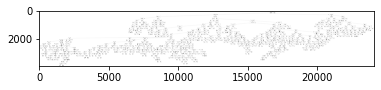

In [ ]:
import matplotlib.image as mpimg

img = mpimg.imread('/content/tree.png')
plt.imshow(img)
plt.show()

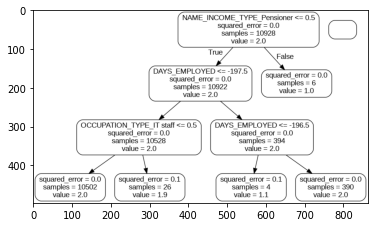

In [ ]:
#Simplified Tree
img = mpimg.imread('/content/small_tree.png')
plt.imshow(img)
plt.show()

###Importance of Each Numerical Variables

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(bigdf_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: MONTHS_BALANCE       Importance: 0.28
Variable: DAYS_BIRTH           Importance: 0.17
Variable: DAYS_EMPLOYED        Importance: 0.16
Variable: AMT_INCOME_TOTAL     Importance: 0.07
Variable: CNT_FAM_MEMBERS      Importance: 0.03
Variable: NAME_INCOME_TYPE_Pensioner Importance: 0.03
Variable: CNT_CHILDREN         Importance: 0.02
Variable: CODE_GENDER_M        Importance: 0.01
Variable: FLAG_OWN_REALTY_Y    Importance: 0.01
Variable: NAME_INCOME_TYPE_State servant Importance: 0.01
Variable: NAME_INCOME_TYPE_Working Importance: 0.01
Variable: NAME_EDUCATION_TYPE_Higher education Importance: 0.01
Variable: NAME_EDUCATION_TYPE_Secondary / secondary special Importance: 0.01
Variable: NAME_FAMILY_STATUS_Married Importance: 0.01
Variable: NAME_FAMILY_STATUS_Single / not married Importance: 0.01
Variable: FLAG_OWN_CAR_Y       Importance: 0.01
Variable: FLAG_WORK_PHONE_Y    Importance: 0.01
Variable: FLAG_PHONE_Y         Importance: 0.01
Variable: FLAG_EMAIL_Y         Importance: 0.0

In [ ]:
#Deleted Columns Brought Back
bigdf=bigdf5.copy()
del(bigdf5)
bigdf.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Location,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
14296,2,157500.0,-10710,-2351,4.0,-21,2,1,0,1,...,0,0,0,0,0,0,1,0,0,0
20718,2,135000.0,-13928,-3052,4.0,-50,2,1,0,1,...,1,0,0,0,0,0,0,0,0,0
20828,2,135000.0,-13928,-3052,4.0,-50,2,1,0,1,...,1,0,0,0,0,0,0,0,0,0
25810,0,94500.0,-22265,-829,1.0,-44,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
36018,0,225000.0,-12325,-187,2.0,-5,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## Class-weighted Logistic Regression Model 7

In [ ]:
#COMPUTE CLASS WEIGHT
from sklearn.utils.class_weight import compute_class_weight
y_1 = np.ones(np.shape(train_features)[0])     # dataset-1
y_2 = np.ones(np.shape(test_features)[0]) + 1 # dataset-2
y = np.concatenate([y_1, y_2])
len(y)
# 1197

classes=[1,2]

cw = compute_class_weight(class_weight = "balanced", classes=classes, y=y)
cw

array([0.66668597, 1.9998263 ])

In [ ]:
#for model class weight

bigdfzzz = bigdfnew.copy()

In [ ]:
bigdfzzz

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
14296,2,157500.0,-10710,-2351,4.0,-21,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
20718,2,135000.0,-13928,-3052,4.0,-50,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
20828,2,135000.0,-13928,-3052,4.0,-50,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
25810,0,94500.0,-22265,-829,1.0,-44,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
36018,0,225000.0,-12325,-187,2.0,-5,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530974,0,112500.0,-9874,-1650,1.0,-13,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0
530982,0,112500.0,-9874,-1650,1.0,-7,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0
530987,1,135000.0,-16302,-8894,3.0,-4,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0
531078,1,112500.0,-14234,-309,3.0,-38,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
goodcustzzz = bigdfzzz[bigdfzzz.Location==2]
goodcustzzz.shape

(22645, 52)

In [ ]:
badcustzzz= bigdfzzz[bigdfzzz.Location==1]
badcustzzz.shape

(381, 52)

In [ ]:
#VARIABEL DEPENDEN
yzzz = bigdfzzz.Location

In [ ]:
#VARIABEL INDEPENDEN
bigdfzzz.drop(['Location'], axis=1, inplace=True)
Xzzz = bigdfzzz
Xzzz.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
14296,2,157500.0,-10710,-2351,4.0,-21,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
20718,2,135000.0,-13928,-3052,4.0,-50,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
20828,2,135000.0,-13928,-3052,4.0,-50,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
25810,0,94500.0,-22265,-829,1.0,-44,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
36018,0,225000.0,-12325,-187,2.0,-5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Xzzz_train, Xzzz_test, yzzz_train, yzzz_test = train_test_split(Xzzz,yzzz,train_size=0.3)

In [ ]:
#hitung weight class untuk 22645 good dan 381 bad (yang bagus tuh sekitar 1 : 40)
#cw good (cw2) = 23026 / (2*22645) = 0,5084124530801501 dan cw bad (cw1) = 23026 / (2*381) = 30,21784776902887 # {2: 0.5084124530801501,1:30.217847769}
modelzzz = LogisticRegression(C=10, class_weight= "balanced", dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   n_jobs=None, penalty='l2',
                   random_state=100, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(Xzzz_train)

        CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
106610             0          112500.0      -19887           -725   
512793             0          225000.0      -17318          -2512   
112045             2          180000.0      -12161          -4280   
48334              0          202500.0      -17262          -1617   
26073              1          270000.0      -13768          -2565   
...              ...               ...         ...            ...   
308418             0          189000.0      -12661           -401   
487393             0          157500.0       -9941          -1990   
462163             0          225000.0      -11828           -165   
289322             1           90000.0      -18878          -3351   
516073             0          180000.0      -19161          -4581   

        CNT_FAM_MEMBERS  MONTHS_BALANCE  CODE_GENDER_M  \
106610              2.0             -29              0   
512793              2.0             -15              0 

In [ ]:
modelzzz.fit(Xzzz_train, yzzz_train)
print(modelzzz.coef_)
print(modelzzz.intercept_)

[[ 3.24314021e-01 -2.12769081e-06  1.94490480e-05 -2.96852097e-05
  -3.91065390e-01 -3.90570352e-03  1.40237669e-01  6.47222290e-01
   9.79958989e-01  7.79037913e-01  5.99991851e-01  6.16486968e-01
   3.09943223e-01 -3.74208277e+00  6.97007839e-01  0.00000000e+00
   8.60856616e-02  3.51176918e-02  9.77081347e-02 -1.88416584e+00
   7.78464755e-02 -2.73044038e-01 -2.31857907e-03 -8.59850354e-01
  -1.41206558e+00  6.47222290e-01  9.79958989e-01  7.79037913e-01
   5.99991851e-01  6.16486968e-01  2.94704538e-01 -2.56545844e-02
  -4.21658188e-02  1.22583419e-02  2.26850093e+00  4.66682153e+00
   4.81534651e-01 -3.76532268e-01  2.90249902e+00  4.20428621e-01
  -1.67197373e+00  4.81289026e-01 -2.44062241e-01  3.22062514e-01
   8.23047917e-01  1.18156669e+00  2.71475573e+00  9.33530915e-01
   3.23911294e-01  8.85056857e-01  3.24924728e+00]]
[-0.60732382]


In [ ]:
y_predzzz = modelzzz.predict(Xzzz_test)
print(y_predzzz)

[2 2 2 ... 2 2 2]


In [ ]:
modelzzz.score(Xzzz_test,yzzz_test)

0.6422855015819839

### Evaluate model 7 with performance metrics for machine learning model

In [ ]:
confusion_matrix(yzzz_test, y_predzzz)

p_predzzz = modelzzz.predict_proba(Xzzz_test)
score_zzz = modelzzz.score(Xzzz_test, yzzz_test)
conf_mzzz = confusion_matrix(yzzz_test, y_predzzz)
reportzzz = classification_report(yzzz_test, y_predzzz)

print(p_predzzz)
print(y_predzzz)
print(score_zzz)
print(conf_mzzz)
print(reportzzz)

metr_1 = accuracy_score(yzzz_test,y_predzzz)
metr_2 = f1_score(yzzz_test,y_predzzz)
metr_3 = recall_score(yzzz_test,y_predzzz)

print(metr_1)
print(metr_2)
print(metr_3)

[[0.33574125 0.66425875]
 [0.31383137 0.68616863]
 [0.30403877 0.69596123]
 ...
 [0.41888104 0.58111896]
 [0.42834825 0.57165175]
 [0.38403731 0.61596269]]
[2 2 2 ... 2 2 2]
0.6422855015819839
[[  117   137]
 [ 5629 10236]]
              precision    recall  f1-score   support

           1       0.02      0.46      0.04       254
           2       0.99      0.65      0.78     15865

    accuracy                           0.64     16119
   macro avg       0.50      0.55      0.41     16119
weighted avg       0.97      0.64      0.77     16119

0.6422855015819839
0.039
0.46062992125984253


## Random Forest Classifier Model 8 (on R)

### Evaluate model 8 with performance metrics for machine learning model (on RSTUDIO)

## SMOTE Oversample Logistic Regression Model 9

In [ ]:
#SMOTEEEE

bigdfsmote = bigdfnew.copy()

In [ ]:
bigdfsmote

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,Location,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
14296,2,157500.0,-10710,-2351,4.0,-21,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
20718,2,135000.0,-13928,-3052,4.0,-50,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
20828,2,135000.0,-13928,-3052,4.0,-50,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
25810,0,94500.0,-22265,-829,1.0,-44,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
36018,0,225000.0,-12325,-187,2.0,-5,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530974,0,112500.0,-9874,-1650,1.0,-13,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0
530982,0,112500.0,-9874,-1650,1.0,-7,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0
530987,1,135000.0,-16302,-8894,3.0,-4,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0
531078,1,112500.0,-14234,-309,3.0,-38,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
goodcustsmote = bigdfsmote[bigdfsmote.Location==2]
goodcustsmote.shape

(22645, 52)

In [ ]:
badcustsmote= bigdfsmote[bigdfsmote.Location==1]
badcustsmote.shape

(381, 52)

In [ ]:
#VARIABEL DEPENDEN
ysmote = bigdfsmote.Location

In [ ]:
#VARIABEL INDEPENDEN
bigdfsmote.drop(['Location'], axis=1, inplace=True)
Xsmote = bigdfsmote
Xsmote.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,CODE_GENDER_M,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
14296,2,157500.0,-10710,-2351,4.0,-21,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
20718,2,135000.0,-13928,-3052,4.0,-50,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
20828,2,135000.0,-13928,-3052,4.0,-50,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
25810,0,94500.0,-22265,-829,1.0,-44,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
36018,0,225000.0,-12325,-187,2.0,-5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Xsmote_train, Xsmote_test, ysmote_train, ysmote_test = train_test_split(Xsmote,ysmote,train_size=0.3,random_state=100)
# concatenate our training data back together
Xsmotenew = pd.concat([Xsmote_train, ysmote_train], axis=1)

# separate minority and majority classes
badcustsm = Xsmotenew[Xsmotenew.Location==1]
goodcustsm = Xsmotenew[Xsmotenew.Location==2]

# upsample minority
badcustsm_upsampled = resample(badcustsm,
                          replace=True, # sample with replacement
                          n_samples=len(goodcustsm), # match number in majority class
                          random_state=100) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([goodcustsm, badcustsm_upsampled])

# check new Location counts
upsampled.Location.value_counts()


2    6803
1    6803
Name: Location, dtype: int64

In [ ]:
ysmotesmote_train = upsampled.Location
Xsmotesmote_train = upsampled.drop('Location', axis=1)

modelsmote = LogisticRegression(solver='liblinear').fit(Xsmotesmote_train, ysmotesmote_train)

In [ ]:
print(Xsmotesmote_train)

        CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
27695              0          135000.0      -18414          -5203   
809                1          211500.0      -16212          -7099   
37857              1          225000.0      -11177          -4205   
505362             0          157500.0      -10336           -985   
465840             0          112500.0      -13137          -2392   
...              ...               ...         ...            ...   
369298             0          315000.0      -10499           -545   
531920             0          225000.0      -12451          -1646   
531970             0           90000.0      -12026          -4770   
533006             2          315000.0      -12037           -197   
304210             0          135000.0      -10712           -217   

        CNT_FAM_MEMBERS  MONTHS_BALANCE  CODE_GENDER_M  \
27695               2.0              -3              0   
809                 3.0             -20              0 

In [ ]:
print(modelsmote.coef_)
print(modelsmote.intercept_)

[[ 1.19804458e+00  1.52686691e-08  2.56038876e-05 -1.53844430e-04
  -8.98147199e-01 -3.35690810e-03 -1.50605788e-01  5.52440247e-02
   1.89873778e-01  4.03478976e-02 -1.22272066e-01  1.91684956e-01
   5.06958193e-01 -1.67952278e+00  3.57401289e-01  2.86189500e-02
  -2.67306811e-03  4.03104774e-01 -4.26269382e-02 -4.55945208e-01
   4.29161804e-01  4.81674454e-01  2.70546798e-02 -8.28070071e-01
  -1.18274212e+00  5.52440247e-02  1.89873778e-01  4.03478976e-02
  -1.22272066e-01  1.91684956e-01 -4.25553108e-02  1.10074138e-01
   1.49444178e-01 -3.58782315e-02  6.52304023e-01  2.42147164e-01
  -5.29179832e-02 -1.85321662e-01  3.26538486e-01 -1.71707299e-01
  -1.13990728e+00  1.12416878e-01 -6.81214587e-01  3.48013048e-01
  -2.47776197e-05  8.19384782e-01  3.09937355e-01  7.29488012e-01
   5.08581345e-01 -1.81639685e-01 -1.28379491e-01]]
[0.38726328]


In [ ]:
y_predsmote = modelsmote.predict(Xsmote_test)
print(y_predsmote)

[2 2 2 ... 1 2 2]


In [ ]:
modelsmote.score(Xsmote_test,ysmote_test)

0.6473106272101247

### Evaluate model 9 with performance metrics for machine learning model

In [ ]:
confusion_matrix(ysmote_test, y_predsmote)

p_predsmote = modelsmote.predict_proba(Xsmote_test)
score_smote = modelsmote.score(Xsmote_test, ysmote_test)
conf_msmote = confusion_matrix(ysmote_test, y_predsmote)
reportsmote = classification_report(ysmote_test, y_predsmote)

met_1 = accuracy_score(ysmote_test,y_predsmote)
met_2 = f1_score(ysmote_test,y_predsmote)
met_3 = recall_score(ysmote_test,y_predsmote)

print(p_predsmote)
print(y_predsmote)
print(score_smote)
print(conf_msmote)
print(reportsmote)

print(met_1)
print(met_2)
print(met_3)

[[0.39201279 0.60798721]
 [0.26727805 0.73272195]
 [0.43133261 0.56866739]
 ...
 [0.57673675 0.42326325]
 [0.29108074 0.70891926]
 [0.48566141 0.51433859]]
[2 2 2 ... 1 2 2]
0.6473106272101247
[[  136   141]
 [ 5544 10298]]
              precision    recall  f1-score   support

           1       0.02      0.49      0.05       277
           2       0.99      0.65      0.78     15842

    accuracy                           0.65     16119
   macro avg       0.51      0.57      0.41     16119
weighted avg       0.97      0.65      0.77     16119

0.6473106272101247
0.045660567399697836
0.49097472924187724


# Explanation, Conclusion, and Suggestion

Yobank dapat menentukan credit scoring customer-nya untuk produk terbaru credit loan. Melalui data understanding, diketahui berbagai macam atribut dan format data yang kemudian digunakan untuk tahap selanjutnya, data preparation. Dalam data preparation, dilakukan penanganan missing values, pengeliminasian outlier, pengkombinasian data, pengecekan ulang dan penangan additional missing values, pengelompokkan data, mengeliminasi ID duplicates, dan pengeliminasian kolom yang tidak signifikan.


Selanjutnya, pada tahap EDA dibuat visualisasi gabungan, ditelaah, dan dianalisis pola data, dan dibuat variabel-variabel dummy. Baru setelah itu, semua pada tahap modeling dilakukan uji coba model-model. Berdasarkan hasil yang diperoleh, model machine learning yang menggunakan Random Forest, Class-Weighted Logistic Regression, Random Forest Classifier, dan SMOTE Oversample Logistic Regression  lebih baik penggunaannya dalam pengklasifikasian observasi. Walaupun model 1-5 memiliki tingkat akurasi/kemampuan merepresentasikan data yang lebih tinggi,  model tersebut kurang cocok apabila digunakan untuk pengklasifikasian data karena tidak mampu mendeteksi/menggolongkan bad customer (0,00 accuracy).

Saran untuk menghadapi dataset yang similar pada masa depan:
1. Mengumpulkan data observasi yang lebih besar dimana kelengkapan informasi yang lebih luas bisa didapatkan secara lebih terbuka sehingga mempermudah dalam pembuatan model.
2. Mengubah metrik performa untuk menguji model.
3. Melakukan resample terhadap dataset yang dimiliki, bisa dengan menggunakan oversampling atau undersampling
4. Membangkitkan dan mengembangkan sampel sintetik yang lebih mendalam seperti SMOTE technique yang telah dilakukan
5. Memperbanyak variasi algoritma dan teknik pemodelan lain untuk menggambarkan variasi.
6. Mencoba penalized models menggunakan model dengan detail lebih lanjut.
7. Menelusuri dataset untuk mendeteksi anomali dan perubahan pola data yang bisa dijadikan informasi yang baik.
8. Mencoba berbagai cara untuk mengolah kembali dataset yang diberikan dengan kreativitas masing masing.